In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

#Load our MNIST dataset.
(XTrain, YTrain), (XTest, YTest) = mnist.load_data()

print('XTrain class = ',type(XTrain))
print('YTrain class = ',type(YTrain))

# shape of our dataset.
print('XTrain shape = ',XTrain.shape)
print('XTest shape = ',XTest.shape)
print('YTrain shape = ',YTrain.shape)
print('YTest shape = ',YTest.shape)
# Number of distinct values of our MNIST target
print('YTrain values = ',np.unique(YTrain))
print('YTest values = ',np.unique(YTest))
# Distribution of classes in our dataset.
unique, counts = np.unique(YTrain, return_counts=True)
print('YTrain distribution = ',dict(zip(unique, counts)))
unique, counts = np.unique(YTest, return_counts=True)
print('YTest distribution = ',dict(zip(unique, counts)))


XTrain class =  <class 'numpy.ndarray'>
YTrain class =  <class 'numpy.ndarray'>
XTrain shape =  (60000, 28, 28)
XTest shape =  (10000, 28, 28)
YTrain shape =  (60000,)
YTest shape =  (10000,)
YTrain values =  [0 1 2 3 4 5 6 7 8 9]
YTest values =  [0 1 2 3 4 5 6 7 8 9]
YTrain distribution =  {np.uint8(0): np.int64(5923), np.uint8(1): np.int64(6742), np.uint8(2): np.int64(5958), np.uint8(3): np.int64(6131), np.uint8(4): np.int64(5842), np.uint8(5): np.int64(5421), np.uint8(6): np.int64(5918), np.uint8(7): np.int64(6265), np.uint8(8): np.int64(5851), np.uint8(9): np.int64(5949)}
YTest distribution =  {np.uint8(0): np.int64(980), np.uint8(1): np.int64(1135), np.uint8(2): np.int64(1032), np.uint8(3): np.int64(1010), np.uint8(4): np.int64(982), np.uint8(5): np.int64(892), np.uint8(6): np.int64(958), np.uint8(7): np.int64(1028), np.uint8(8): np.int64(974), np.uint8(9): np.int64(1009)}


Now let's visualize the distribution of our data by classes.

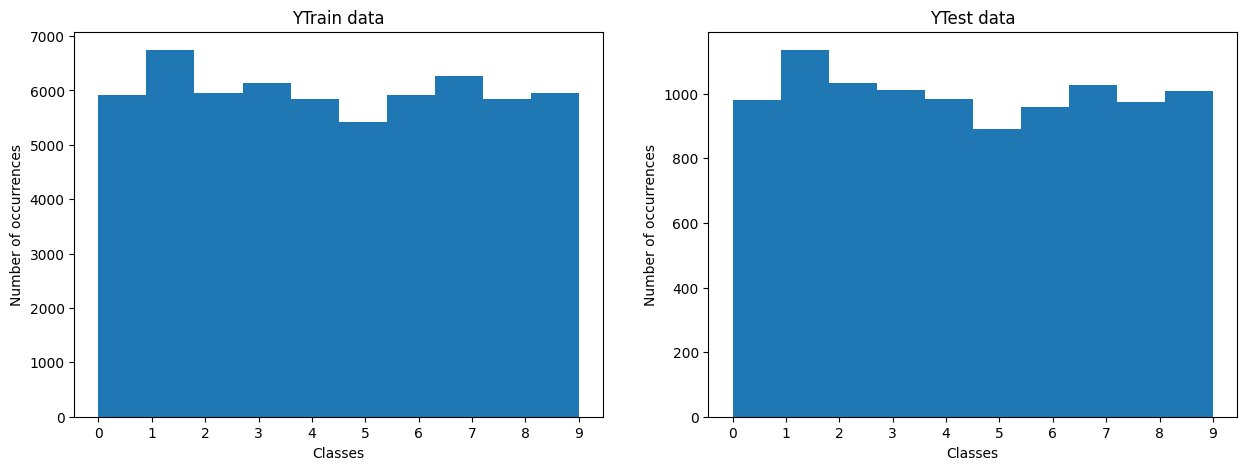

In [ ]:
# we plot an histogram distribution of our test and train data.
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].hist(YTrain, ec='black')
axs[0].set_title('YTrain data')
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Number of occurrences')
axs[1].hist(YTest, ec='black')
axs[1].set_title('YTest data')
axs[1].set_xlabel('Classes')
axs[1].set_ylabel('Number of occurrences')
# We want to show all ticks...
axs[0].set_xticks(np.arange(10))
axs[1].set_xticks(np.arange(10))

plt.show()


In [ ]:
# Data normalization.
XTrain = XTrain.astype('float32') / 255
XTest = XTest.astype('float32') / 255
# data reshapping.
XTrain = XTrain.reshape((len(XTrain), np.prod(XTrain.shape[1:])))
XTest = XTest.reshape((len(XTest), np.prod(XTest.shape[1:])))

print (XTrain.shape)
print (XTest.shape)


(60000, 784)
(10000, 784)


In [ ]:
InputModel = Input(shape=(784,))
EncodedLayer = Dense(32, activation='relu')(InputModel)
DecodedLayer = Dense(784, activation='sigmoid')(EncodedLayer)

AutoencoderModel = Model(InputModel, DecodedLayer)
# we can summarize our model.
AutoencoderModel.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Let's train the model using adadelta optimizer
AutoencoderModel.compile(optimizer='adadelta', loss='binary_crossentropy')

history = AutoencoderModel.fit(XTrain, XTrain,
                    batch_size=256,
                    epochs=100,
                    shuffle=True,
                    validation_data=(XTest, XTest))
# Make prediction to decode the digits
DecodedDigits = AutoencoderModel.predict(XTest)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6929 - val_loss: 0.6928
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6925 - val_loss: 0.6924
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6923 - val_loss: 0.6922
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6921 - val_loss: 0.6920
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6919 - val_loss: 0.6918
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6917 - val_loss: 0.6916
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━

dict_keys(['loss', 'val_loss'])


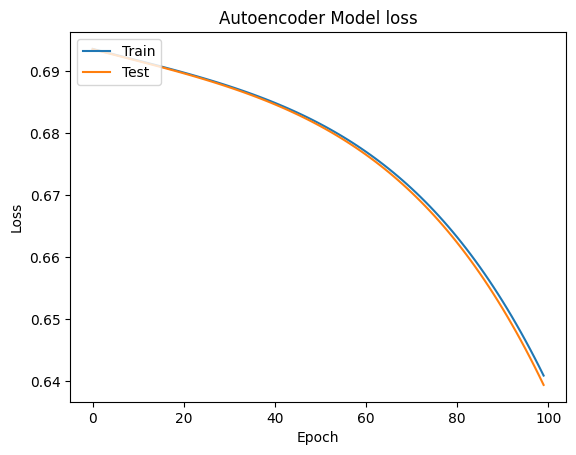

In [ ]:
def plotmodelhistory(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Autoencoder Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())
# visualization of the loss minimization during the training process
plotmodelhistory(history)

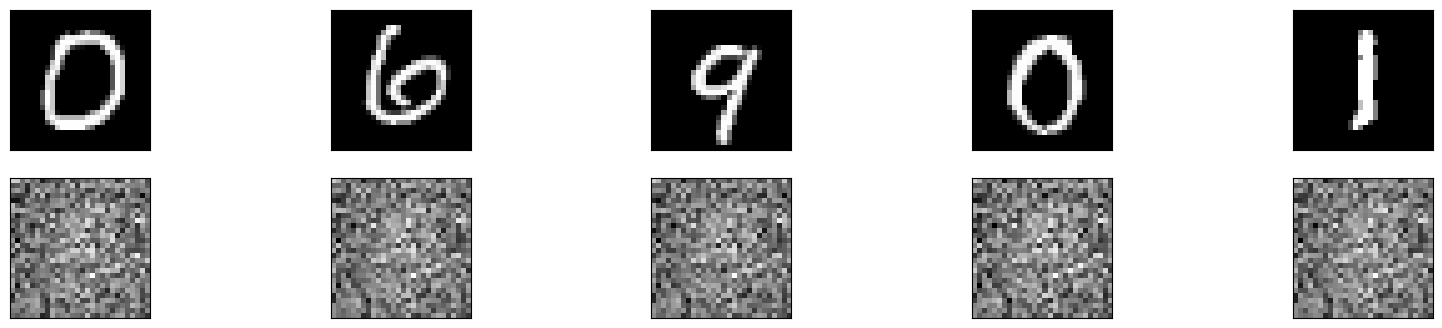

In [ ]:
n=5
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    # input image
    plt.imshow(XTest[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    # Image decoded by our Auto-encoder
    plt.imshow(DecodedDigits[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()